In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostClassifier
from sklearn.metrics import mean_squared_error, roc_curve, auc, classification_report,plot_confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from yellowbrick.classifier import ClassificationReport

import warnings
warnings.filterwarnings("ignore")

In [2]:
bank_df = pd.read_csv(r'C:\Users\Halil İbrahim\Desktop\Kalbye.AI\Ensemble Learning\Bagging and Random Forest\bank.csv')
df = bank_df.copy()

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
features = df.drop("deposit",axis =1)
label = df["deposit"]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.33, random_state = 42)

In [7]:
categoric_variables = ["job","marital","education","default","housing","loan","contact","month","poutcome","deposit"]
numeric_variables = ["age","day","balance","duration","campaign","pdays","previous"]

Label Encoding

In [8]:
# We don't want to deposit varaible in using label encoder
label_encoders = pd.Series()
for deger in categoric_variables[:9]:
    lr = LabelEncoder()
    label_encoders[deger] = lr
    x_train[deger] = lr.fit_transform(x_train[deger])
    x_test[deger] = lr.transform(x_test[deger])

lr_y = LabelEncoder()
y_train = lr_y.fit_transform(y_train)
y_test = lr_y.transform(y_test)


              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1917
           1       0.81      0.87      0.84      1767

    accuracy                           0.84      3684
   macro avg       0.84      0.84      0.84      3684
weighted avg       0.84      0.84      0.84      3684

Confusion Matrix Plot


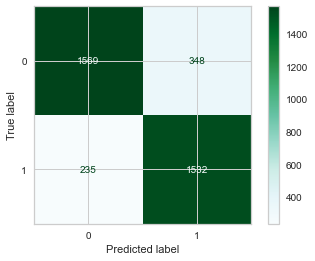

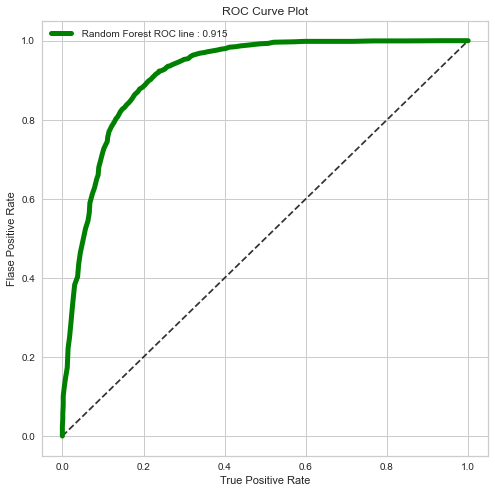

In [9]:
# Random Forest Model Fitting by x_train, y_train 
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_proba = rf.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba)
roc_curve_rf = auc(fpr_rf,tpr_rf)

## We wiil to result of Random Forest 
print(classification_report(y_test,y_pred))
print("Confusion Matrix Plot")
plot_confusion_matrix(rf,x_test,y_test,cmap = 'BuGn');
plt.show()

#Plot Roc Curve
plt.figure(figsize = (8,8))
plt.title("ROC Curve Plot")
plt.plot([0,1],[0,1], '--',color ="black",alpha = 0.8)
plt.plot(fpr_rf, tpr_rf, label = " Random Forest ROC line : %0.3f" % roc_curve_rf, color = 'green',linewidth = 5);
plt.xlabel("True Positive Rate")
plt.ylabel("Flase Positive Rate")
plt.legend(loc ='best');

Visualization With t-SNE

### Visualization with PCA

#### Standard Scaling

In [10]:
sc = StandardScaler()
for variable in x_train.columns:
    x_train[variable] = sc.fit_transform(x_train[variable].values.reshape(-1,1))
    x_test[variable] = sc.transform(x_test[variable].values.reshape(-1,1))

In [11]:
#plt.text(x_pos, y_pos, "text on plot")
#we defined a method for adding labels for each bar on bar plot
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i+1.2,y[i],y[i])

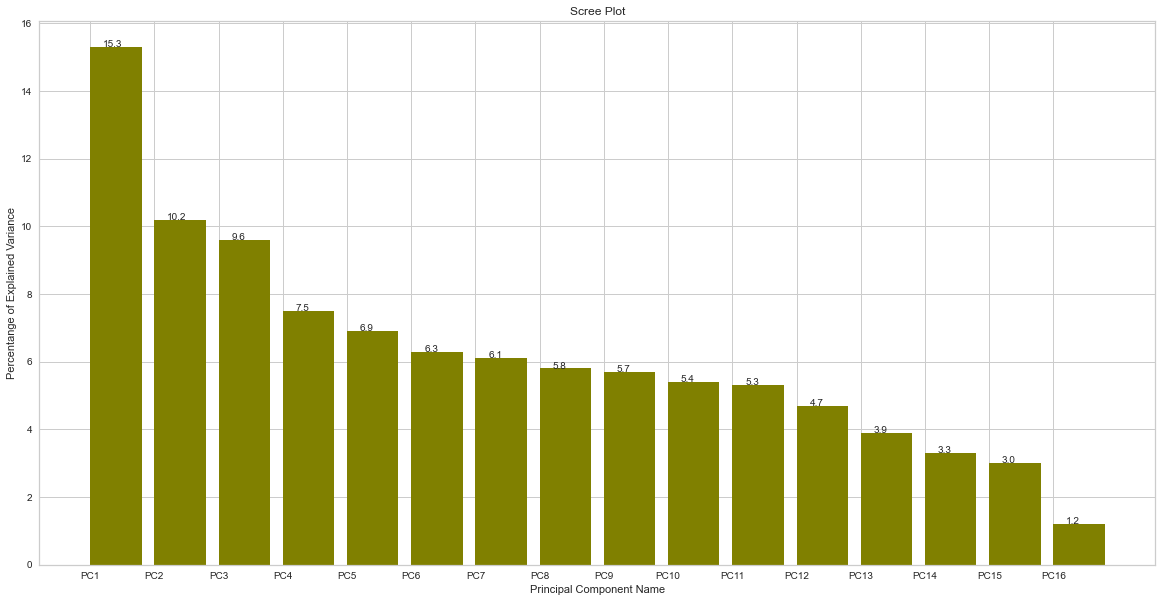

In [12]:
from sklearn.decomposition import PCA
"""
İn this case, Look the PCA explained ratio
"""

pca = PCA()
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

#We define each pca's percent of explanied variance 
#And define label on each pca
per_varyans = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC'+ str(x) for x in range(1,len(per_varyans)+1)]

# Barplot
plt.figure(figsize = (20,10))
plt.bar(x = range(1,len(per_varyans)+1), height = per_varyans, tick_label = labels, align = 'edge', color = "olive")
add_labels(labels, per_varyans)
plt.title("Scree Plot")
plt.xlabel("Principal Component Name")
plt.ylabel("Percentange of Explained Variance")

plt.show()


We can't visualization with PCA because PCA couldn't fully seperate the data. If we use PCA. We won't get result effectively. 

## Regression with Random Forest

In [13]:
insurance_df = pd.read_csv(r'C:\Users\Halil İbrahim\Desktop\Kalbye.AI\Ensemble Learning\Bagging and Random Forest\insurance.csv')
df_reg = insurance_df.copy()
df_reg

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df_reg.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
features_reg = df_reg.drop("charges",axis  =1)
label_reg = df_reg["charges"]

# Model Split for RF regression
x_train_reg,x_test_reg,y_train_reg, y_test_reg = train_test_split(features_reg,label_reg, test_size = 0.33, random_state = 42)

#### Label Encoding

In [16]:
le_reg = LabelEncoder()
for variable in ["sex","smoker","region"]:
  x_train_reg[str(variable)] = le_reg.fit_transform(x_train_reg[variable])
  x_test_reg[variable] = le_reg.transform(x_test_reg[variable])

In [17]:
rfr = RandomForestRegressor()
rfr.fit(x_train_reg, y_train_reg)
y_pred = rfr.predict(x_test_reg)

In [18]:
mse = mean_squared_error(y_test_reg ,y_pred)
print("MSE:",mse)
print("RMSE:", mse **.5)

MSE: 23129198.875417948
RMSE: 4809.28257387918


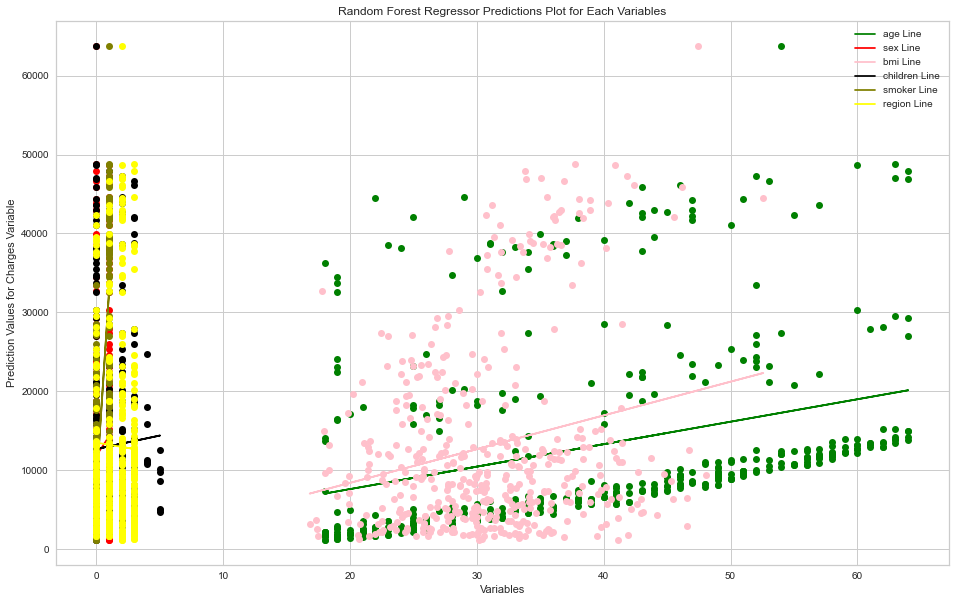

In [19]:
# Plot Random Forest 
plt.figure(figsize = (16,10))
plt.title("Random Forest Regressor Predictions Plot for Each Variables")
colors = ["green","red","pink","black","olive","yellow","purple"]
index = 0
# We want to doing for every independent variable scatter and regression line plot for scatterplot
for variable in x_test_reg.columns:
    plt.plot(x_test_reg[variable].values,y_test_reg.values, 'o',c = colors[index])
    m,b = np.polyfit(x_test_reg[variable],y_test_reg,1)
    plt.plot(x_test_reg[variable].values,m*x_test_reg[variable].values+b,
             c = colors[index],label = "%s Line" %variable, alpha = 1)
    plt.xlabel("Variables")
    plt.ylabel("Prediction Values for Charges Variable")
    plt.legend(loc = "best")
    index +=1


# Boosting

In [20]:
def boost_models(model, title:str, x_train, y_train):
    """
    This method model that we sent method fitting and show classfication report, confusion matrıx plot and Roc Curve Plot

    :param model => variable that assigned boost method
    :param title => Plot title 
    :param x_train => x_train
    :param y_train => y_train

    """ 
    if not isinstance(title, str):
        raise TypeError("Title type couldn't string")
    if((x_train.shape[1] == x_train.shape[1]) & (x_train.shape[0] == y_train.shape[0])):
        print("Shapes are true.")
    else:
        raise IndexError("X_train and y_train not same size")
   

    print("Model fit process is started")
    model.fit(x_train,y_train)
    y_pred =  model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    print("Model fit process and created predict and predict proba")
    print(classification_report(y_pred,y_test))

    print("Confusion Matrix Plot")
    plot_confusion_matrix(model,x_test,y_test, cmap = 'BuGn')

    #Calculate tpr, fpr, thresholds and roc_curve
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
    roc_curve_auc = auc(fpr,tpr)

    #Plot Roc Curve
    plt.figure(figsize = (16,8))
    plt.plot([0,1],[0,1], "--", c = "black", alpha= 0.8)
    plt.plot(fpr,tpr,'-,', color = "green", alpha = 1, label = "Line : %0.3f" % roc_curve_auc)
    plt.ylabel("True Positive Rate (TPR)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.title(title)
    plt.legend(loc = 'best')


Shapes are true.
Model fit process is started
Model fit process and created predict and predict proba
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1982
           1       0.79      0.82      0.81      1702

    accuracy                           0.82      3684
   macro avg       0.82      0.82      0.82      3684
weighted avg       0.82      0.82      0.82      3684

Confusion Matrix Plot


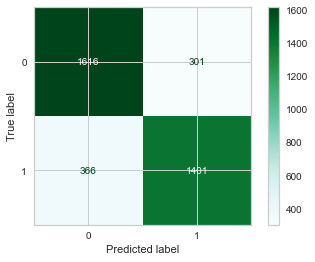

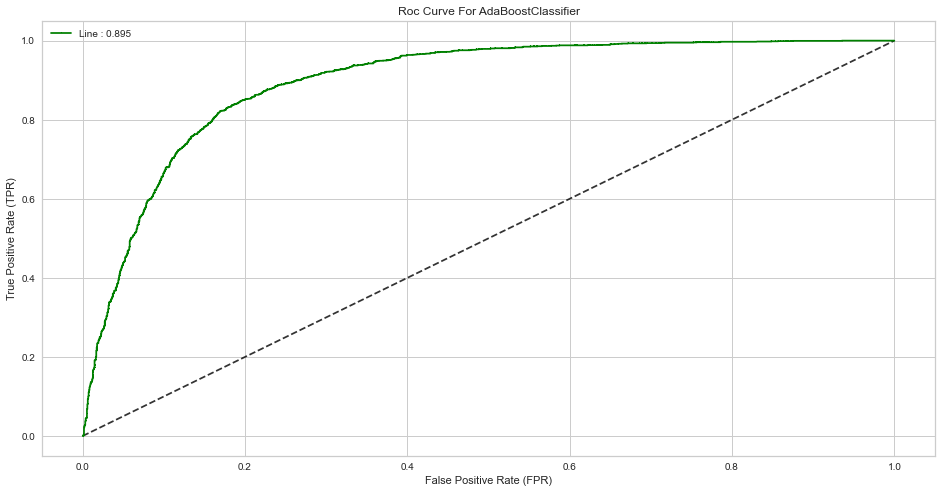

In [21]:
ada = AdaBoostClassifier()
boost_models(ada,"Roc Curve For AdaBoostClassifier",x_train,y_train)

Shapes are true.
Model fit process is started
Model fit process and created predict and predict proba
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1825
           1       0.87      0.83      0.85      1859

    accuracy                           0.85      3684
   macro avg       0.85      0.85      0.85      3684
weighted avg       0.85      0.85      0.85      3684

Confusion Matrix Plot


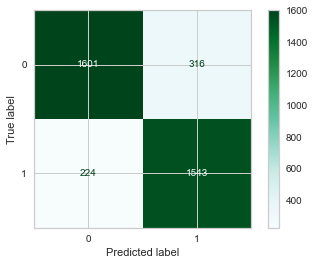

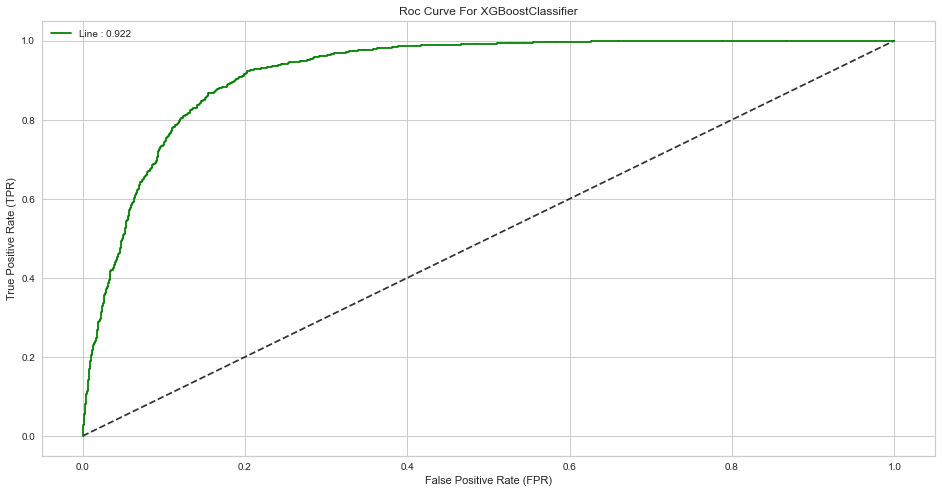

In [22]:
xgb = XGBClassifier()
boost_models(xgb, "Roc Curve For XGBoostClassifier",x_train,y_train)

# Stacking

Firstly, we define different ensemble models and fitting its. Then we put on the Stacking model seperately. And we analyzing models in Stacking model 

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [24]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Splitting DataFrame

In [25]:
features =df.drop("Outcome", axis = 1)
label = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33, random_state=42)

Fitting Models

### Gradient Boosting

In [26]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
gbc_train_pred = gbc.predict(x_train)
print(classification_report(y_test,gbc_pred))  

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       168
           1       0.60      0.64      0.62        86

    accuracy                           0.73       254
   macro avg       0.70      0.71      0.71       254
weighted avg       0.74      0.73      0.73       254



### Random Forest

In [27]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_train_pred = rf.predict(x_train)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       168
           1       0.63      0.63      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254



### Decision Tree

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_train_pred = dt.predict(x_train)
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       157
           1       0.64      0.57      0.60        97

    accuracy                           0.71       254
   macro avg       0.69      0.68      0.69       254
weighted avg       0.71      0.71      0.71       254



### XGBoost

In [29]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_train_pred = xgb.predict(x_train)
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       155
           1       0.65      0.57      0.61        99

    accuracy                           0.71       254
   macro avg       0.70      0.69      0.69       254
weighted avg       0.71      0.71      0.71       254



## Stacking Process

PCA işlemi Uygulayarak görselleştirmemizi gerçekleştirelim

In [30]:
pca_three = PCA(n_components = 3)
x_reduced_three = pca_three.fit_transform(x_test)

pca_two  = PCA(n_components=2)
x_reduced_two = pca_two.fit_transform(x_test)

Görselleştirelim ve nasıl dağıldıklarının görelim

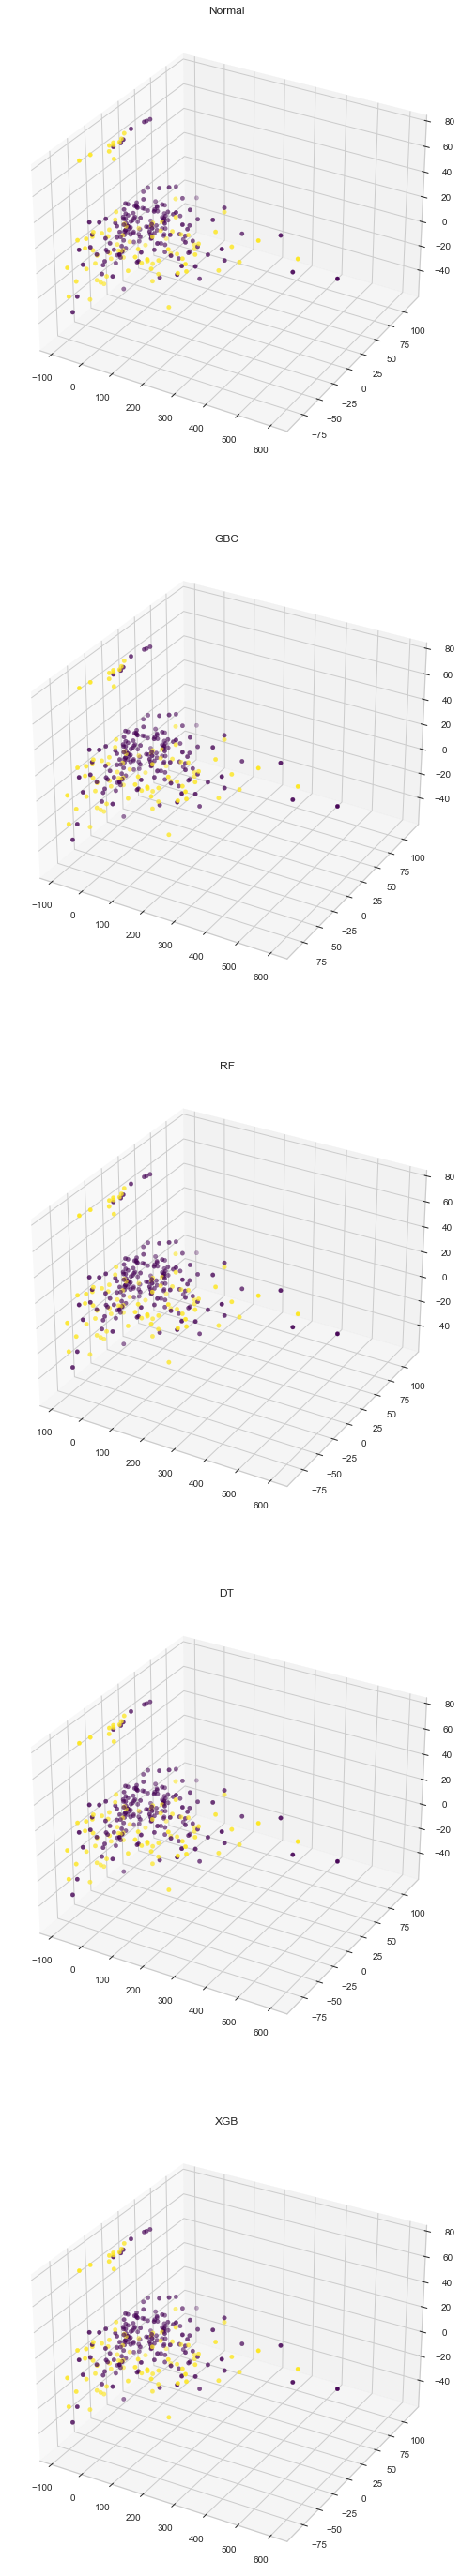

In [43]:
fig = plt.figure(figsize = (10,50))
index = 1
titles = ['Normal', 'GBC','RF','DT','XGB']
for y in [y_test, gbc_pred, rf_pred,dt_pred, xgb_pred]:
    ax = fig.add_subplot(5,1,index, projection = '3d')
    ax.set_title(titles[index -1])
    ax.scatter3D(x_reduced_three[:,0], x_reduced_three[:,1], x_reduced_three[:,2], c = y_test, cmap = 'viridis', s = 20)
    index +=1
plt.show()

Aynısını 2 boyut için yapalım

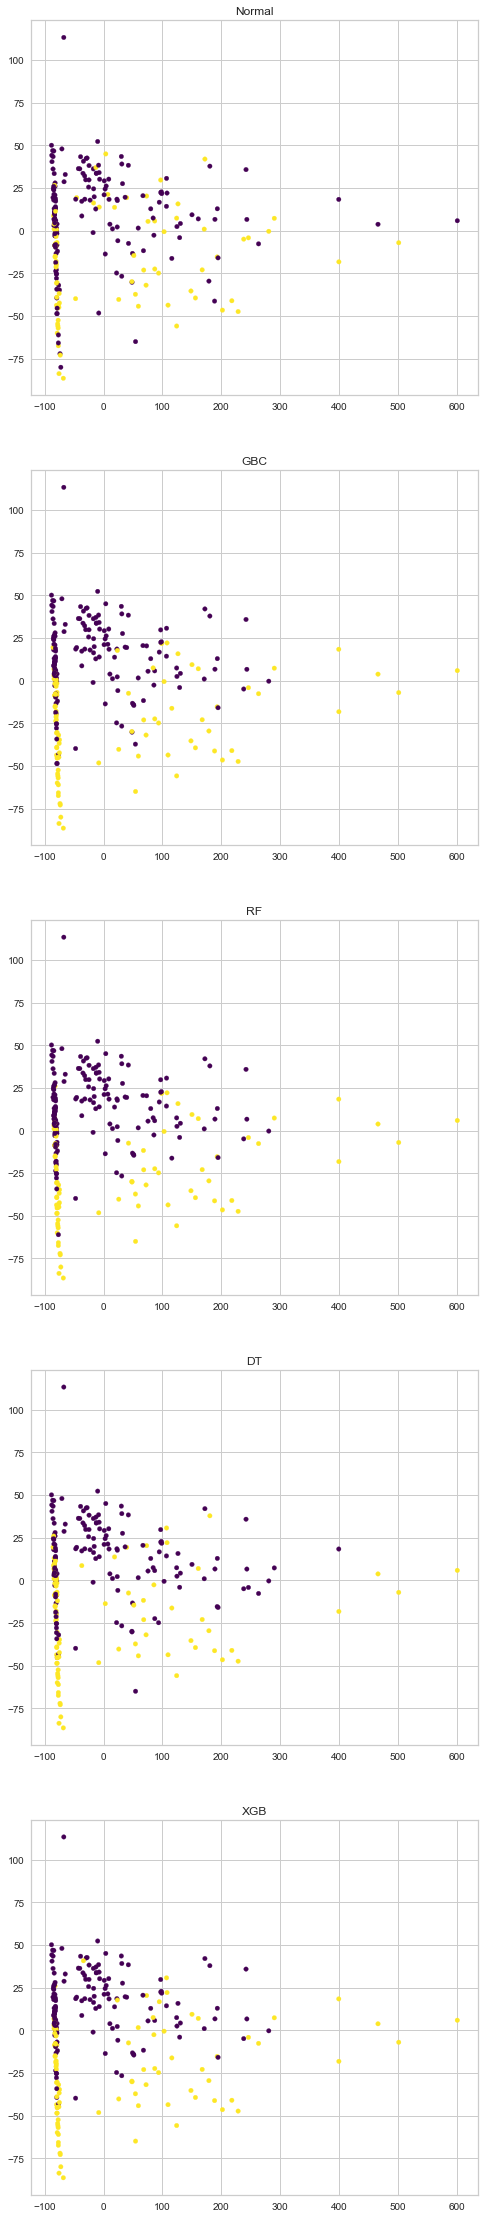

In [41]:
fig = plt.figure(figsize = (8,40))
index = 1
titles = ['Normal', 'GBC','RF','DT','XGB']
for y in [y_test, gbc_pred, rf_pred,dt_pred, xgb_pred]:
    ax = fig.add_subplot(5,1,index)
    ax.set_title(titles[index -1])
    ax.scatter(x_reduced_two[:,0], x_reduced_two[:,1], c = y,cmap = 'viridis', s = 20)
    index +=1
plt.show()

In [44]:
print("10-fold cross validation \n")
accuracy_scores = []

labels = []

for clf, label in zip([gbc,rf,dt,xgb],["Gradient Boosting",
                            "Random Forest",
                            "Decision Tree",
                            "XGBoost"]):
    sclf_scores = cross_val_score(clf,x_train, y_train, cv = 10, scoring = 'accuracy')
    accuracy_scores.append(sclf_scores.mean())
    labels.append(label)
    print("Model: [%s] Accuracy: %0.3f" % (label, sclf_scores.mean()))

10-fold cross validation 

Model: [Gradient Boosting] Accuracy: 0.780
Model: [Random Forest] Accuracy: 0.772
Model: [Decision Tree] Accuracy: 0.735
Model: [XGBoost] Accuracy: 0.739


Base modellerden gelen tahminler üzerine Meta modelimize vererek bir sonuç çıkaracağız. Meta modelimizde **Random Forest** algoritmasını kullanacağız.

In [45]:
train_stack = np.column_stack((dt_train_pred,gbc_train_pred,xgb_train_pred, rf_train_pred))

test_stack = np.column_stack((dt_pred,gbc_pred,xgb_pred, rf_pred))

In [48]:
final_model = RandomForestClassifier()
final_model.fit(train_stack, y_train)

y_stack_pred = final_model.predict(test_stack)

print("Accuracy Score:", accuracy_score(y_stack_pred, y_test))

Accuracy Score: 0.7322834645669292


Model Kontrolünü yapalım

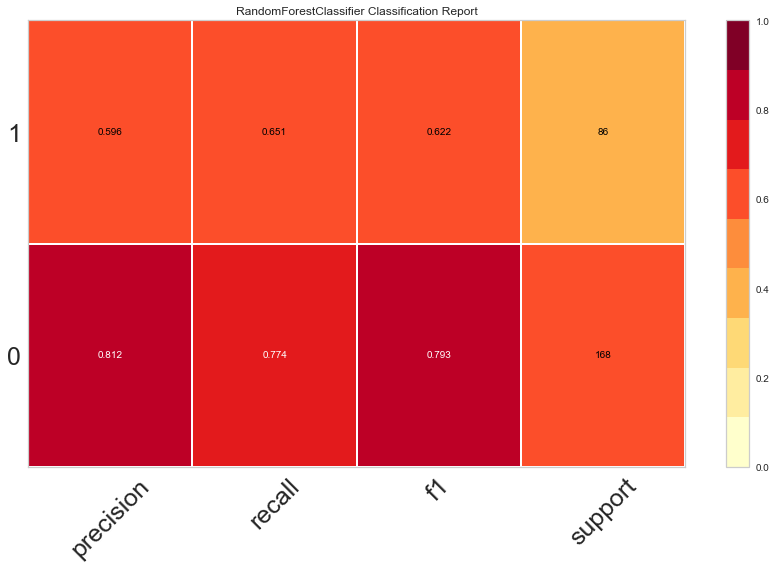

In [51]:
visualizer = ClassificationReport(final_model, classes = [0,1], support = True, fontsize=25)

plt.figure(figsize = (12,8))
visualizer.score(test_stack, y_test)
visualizer.poof();